# [k]array: labeled multi-dimensional arrays

[![karray Status Badge](https://img.shields.io/pypi/v/karray.svg)](https://pypi.org/project/karray/)
[![karray Python Versions](https://img.shields.io/pypi/pyversions/karray.svg)](https://pypi.org/project/karray/)
[![karray license](https://img.shields.io/pypi/l/karray.svg)](https://pypi.org/project/karray/)
[![Downloads](https://static.pepy.tech/badge/karray)](https://pepy.tech/project/karray)
[![Pipeline](https://gitlab.com/diw-evu/karray/badges/main/pipeline.svg)](https://gitlab.com/diw-evu/karray/-/commits/main)

Karray is a simple tool that intends to abstract the users from the complexity of working with labelled multi-dimensional arrays. Numpy is the tool’s core, with an extensive collection of high-level mathematical functions to operate on multi-dimensional arrays efficiently thanks to its well-optimized C code. With Karray, we put effort into generating lightweight objects expecting to reduce overheads and avoid large loops that cause bottlenecks and impact performance. Numpy is the only relevant dependency, while Polars, Pandas, sparse and Pyarrow are required to import, export and store the arrays. `karray` is developed by the research group `Transformation of the Energy Economy` at [DIW Berlin](https://www.diw.de/en/diw_01.c.604205.en/energy__transportation__environment_department.html) (German Institute of Economic Research).

## Quick overview

Karray has distinct features. In this overview, we will briefly describe two important ones. How to perform element-wise operations with arrays with mismatched coordinates and how we can represent multi-dimensional arrays in long format data for better visualization and analysis.

### Operations with mismatched coordinates

Karray is a Python library that provides powerful tools for working with multi-dimensional arrays, offering a unique advantage over other libraries when it comes to handling mismatched coordinates during element-wise operations.

One of the standout features of Karray is its ability to perform element-wise operations on arrays with mismatched coordinates along a dimension. This is particularly useful when working with data that may have different sets of coordinates for the same dimension.

Consider the following example:


In [1]:
import pandas as pd
import karray as ka

In [2]:
stock_dict = {'origin': ['Canada', 'Canada', 'Brazil', 'Brazil'],
              'fruit': ['apple', 'orange', 'banana', 'mango'],
              'value': [10.0, 20.0, 300.0, 400.0]}

stock_df = pd.DataFrame(stock_dict)
stock_df

,origin,fruit,value
0,Canada,apple,10.0
1,Canada,orange,20.0
2,Brazil,banana,300.0
3,Brazil,mango,400.0


In [3]:
# Create an array with mismatched coordinates
stock = ka.from_pandas(stock_df)

In [4]:
price_dict = {'origin': ['Canada', 'Brazil', 'Brazil'],
              'fruit': ['apple', 'banana', 'mango'],
              'value': [0.1, 0.2, 0.3]}

price_df = pd.DataFrame(price_dict)
price_df

,origin,fruit,value
0,Canada,apple,0.1
1,Brazil,banana,0.2
2,Brazil,mango,0.3


In [5]:
price = ka.from_pandas(price_df)

In [6]:
# Perform element-wise multiplication
bill = stock * price

In this example, `stock` and `price` arrays have mismatched coordinates along the 'fruit' dimension. The `stock` array includes 'orange', while the `price` array does not.

With Karray, performing element-wise multiplication (`stock * price`) yields the following result:


In [7]:
bill

Long object size,72 bytes
Data object type,dense
Data object size,64 bytes
Dimensions,"['origin', 'fruit']"
Shape,"[2, 4]"
Capacity,8
Rows,3


In [8]:
bill.to_pandas(dense=True)

,origin,fruit,value
0,Brazil,apple,0.0
1,Brazil,banana,60.0
2,Brazil,mango,120.0
3,Brazil,orange,0.0
4,Canada,apple,1.0
5,Canada,banana,0.0
6,Canada,mango,0.0
7,Canada,orange,0.0


Karray aligns the arrays based on the matching coordinates and performs the multiplication only for those elements. The mismatched coordinates are ignored, and the resulting array `bill` contains the correctly computed values.

In contrast, other libraries like Xarray would produce an array with removed the mismatched coordinates, requiring additional data manipulation to align the coordinates before performing the operation.

Below is an example with Xarray:


In [9]:
import xarray as xr

stockxr = xr.DataArray(data=stock.dense, coords=stock.coords)
pricexr = xr.DataArray(data=price.dense, coords=price.coords)

billxr = stockxr * pricexr

In [10]:
# Using karray to visualize xarray billxr object
ka.Array(data=billxr.data, coords={
         dim: uniques.values for dim, uniques in billxr.coords.items()}).to_pandas(dense=True)

,origin,fruit,value
0,Brazil,apple,0.0
1,Brazil,banana,60.0
2,Brazil,mango,120.0
3,Canada,apple,1.0
4,Canada,banana,0.0
5,Canada,mango,0.0


Alike with karray, 'orange' disappears from the `billxr` object. The image below ilustrates the difference between Karray and Xarray.


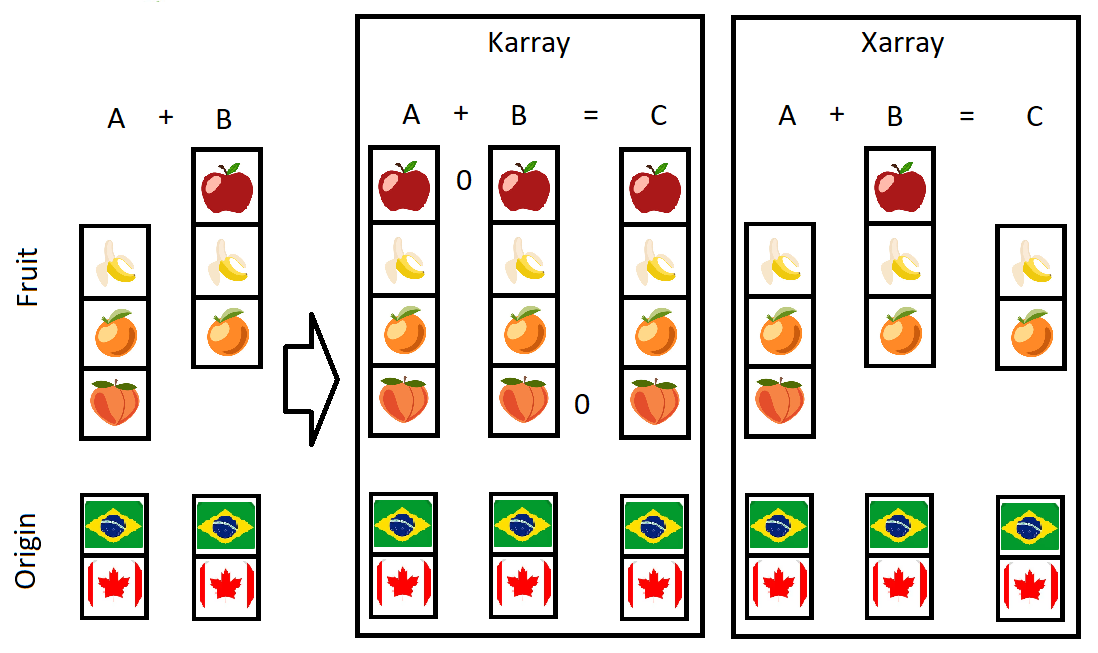

In [11]:
from IPython.display import Image
Image(filename='images/karray_xarray.png', width=500)

**Here's another example that demonstrates the flexibility of Karray:**


In [12]:
stock_dict = {'origin': ['Canada', 'Canada', 'Brazil', 'Brazil'],
              'fruit': ['apple', 'orange', 'apple', 'orange'],
              'value': [10.0, 20.0, 300.0, 400.0]}
stock_df = pd.DataFrame(stock_dict)
stock = ka.from_pandas(stock_df)
stock.to_pandas(dense=True)

,origin,fruit,value
0,Brazil,apple,300.0
1,Brazil,orange,400.0
2,Canada,apple,10.0
3,Canada,orange,20.0


In [13]:
price_dict = {'origin': ['Canada', 'Canada', 'Brazil', 'Brazil'],
              'fruit': ['mango', 'banana', 'mango', 'banana'],
              'value': [0.1, 0.2, 0.3, 0.4]}
price_df = pd.DataFrame(price_dict)
price = ka.from_pandas(price_df)
price.to_pandas(dense=True)

,origin,fruit,value
0,Brazil,banana,0.4
1,Brazil,mango,0.3
2,Canada,banana,0.2
3,Canada,mango,0.1


In [14]:
# Perform element-wise multiplication
bill = stock * price

In this case, `stock` and `price` arrays have mismatched coordinates along the 'fruit' dimension. The `stock` array includes 'apple' and 'orange', while the `price` array does not, instead includes 'mango' and 'banana'.

Karray handles this situation gracefully and produces the following result:


In [15]:
bill.to_pandas(dense=True)

,origin,fruit,value
0,Brazil,apple,0.0
1,Brazil,banana,0.0
2,Brazil,mango,0.0
3,Brazil,orange,0.0
4,Canada,apple,0.0
5,Canada,banana,0.0
6,Canada,mango,0.0
7,Canada,orange,0.0


The element-wise multiplication is performed only for the matching coordinates, and the mismatched coordinates are ignored. In this case, as there is no matching coordinates, the result is an zeros array, while keeping the union of the 'fruit' coordinates.


Quickly we test with xarray:


In [16]:
stockxr = xr.DataArray(data=stock.dense, coords=stock.coords)
pricexr = xr.DataArray(data=price.dense, coords=price.coords)

billxr = stockxr * pricexr

# Using karray to visualize xarray billxr object
ka.Array(data=billxr.data, coords={
         dim: uniques.values for dim, uniques in billxr.coords.items()}).to_pandas(dense=True)

,origin,fruit,value


xarray produces an empty array because there are no matching coordinates. If you want to perform a new operation, it will fail while karray can handle it.


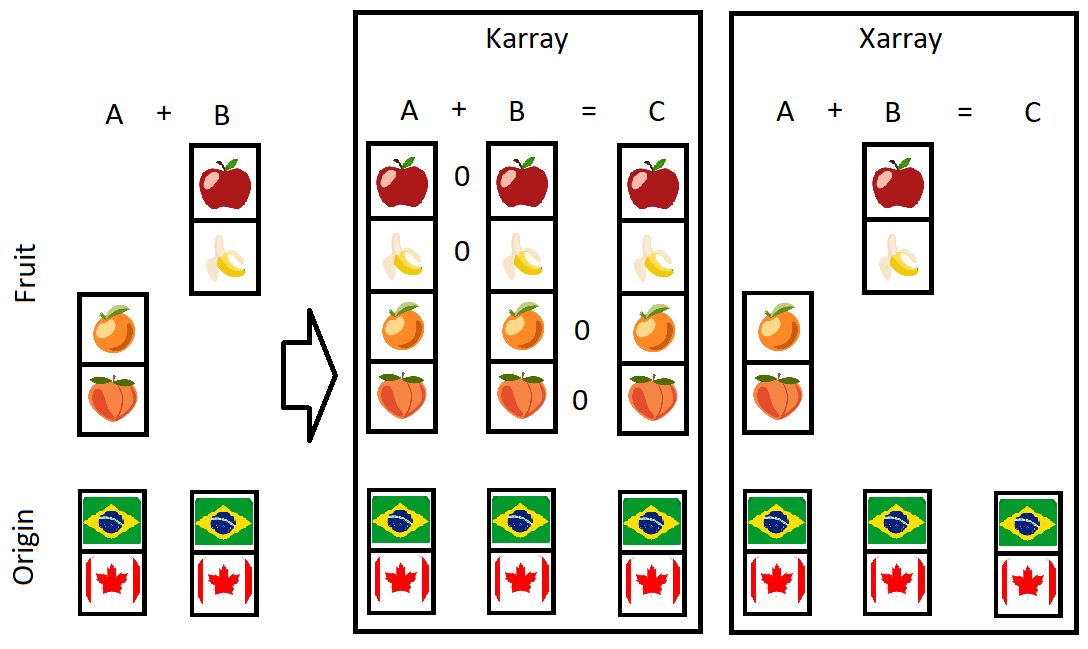

In [17]:
Image(filename='images/empty1.png', width=500)

Karray seems to align the arrays based on the matching coordinates and performs the operation only for those elements, ignoring the mismatched coordinates. This behavior is more intuitive and convenient when working with arrays that may have different sets of coordinates along a dimension.

The disadvantage of Xarray in this regard is that it requires strict matching of coordinates for element-wise operations, which can lead to unexpected results or the need for additional data manipulation to align the coordinates before performing the desired operation.

Karray's ability to handle mismatched coordinates gracefully and perform operations based on the matching coordinates is a significant advantage, providing more flexibility and ease of use in scenarios where the arrays may have different sets of coordinates.


### Dataframe long format

karray allows you to work with multi-dimensional arrays in long format data using DataFrames. This feature is particularly useful when working with more than two dimensions, as our brain is more familiar with tabular data.

#### Reserved keyword

There is one reserved keyword that is not permitted to be used as a dimension name in long format data: `'value'`. The reserved keyword `'value'` is used to represent the values of the array.

#### Building a dataFrame for karray

To build a DataFrame to be used in karray, you need to follow these steps:

1. Use the header of the DataFrame as the dimension names.
2. Include a `'value'` column to represent the values of the array.
3. Ensure that the combination of coordinates at every row of the DataFrame is unique.

If you provide a DataFrame without the `'value'` column or if the combination of coordinates is not unique, an error will be raised when you attempt to convert it to an array.

#### Examples

Here are a few examples to illustrate how to create a DataFrame suitable for karray:

##### Example 1: Simple 2D Array

```python
import pandas as pd
import karray as ka

data = {
    'dim1': ['a', 'a', 'b', 'b'],
    'dim2': [1, 2, 1, 2],
    'value': [10, 20, 30, 40]
}

df = pd.DataFrame(data)
arr = ka.from_pandas(df)
```

In this example, we create a DataFrame `df` with dimensions `'dim1'` and `'dim2'`, and a `'value'` column representing the values of the array. Each row in the DataFrame represents a unique combination of coordinates.

##### Example 2: 3D Array

```python
import pandas as pd
import karray as ka

data = {
    'dim1': ['a', 'a', 'a', 'a', 'b', 'b', 'b', 'b'],
    'dim2': [1, 1, 2, 2, 1, 1, 2, 2],
    'dim3': ['x', 'y', 'x', 'y', 'x', 'y', 'x', 'y'],
    'value': [10, 20, 30, 40, 50, 60, 70, 80]
}

df = pd.DataFrame(data)
arr = ka.from_pandas(df)
```

In this example, we create a DataFrame `df` with three dimensions: `'dim1'`, `'dim2'`, and `'dim3'`. The `'value'` column represents the values of the array. Each row in the DataFrame represents a unique combination of coordinates in the 3D array.

##### Example 3: Missing Value Column

```python
import pandas as pd
import karray as ka

data = {
    'dim1': ['a', 'a', 'b', 'b'],
    'dim2': [1, 2, 1, 2]
}

df = pd.DataFrame(data)
arr = ka.from_pandas(df)  # Raises an error
```

In this example, the DataFrame `df` is missing the `'value'` column. When we attempt to create an array using this DataFrame, an error will be raised because the `'value'` column is required.

##### Example 4: Non-Unique Coordinates

```python
import pandas as pd
import karray as ka

data = {
    'dim1': ['a', 'a', 'b', 'b'],
    'dim2': [1, 1, 2, 2],
    'value': [10, 20, 30, 40]
}

df = pd.DataFrame(data)
arr = ka.from_pandas(df)  # Raises an error
```

In this example, the DataFrame `df` contains non-unique combinations of coordinates. The rows with `'dim1'` as `'a'` and `'dim2'` as `1` appear twice. When we attempt to create an array using this DataFrame, an error will be raised because the combination of coordinates must be unique.


### Advantages of karray

1. **Flexibility**: Karray allows you to work with arrays that have different sets of coordinates along a dimension, providing flexibility in data representation and analysis.

2. **Intuitive Operations**: Element-wise operations in Karray are performed based on matching coordinates, making the results more intuitive and aligned with expectations.

3. **Efficiency**: Karray's ability to handle mismatched coordinates gracefully eliminates the need for additional data manipulation steps, leading to more efficient and streamlined code.

4. **Convenience**: karray provides a convenient way to work with multi-dimensional arrays using long format data in DataFrames. By following the guidelines of using dimension names as headers, including a `'value'` column, and ensuring unique combinations of coordinates, you can easily create arrays from DataFrames and perform various operations on them.
